<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_VisualizacionDeDatos/blob/main/Tarea3_CarolinaHerreraAzolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resumen

Instrucciones

¡Bienvenido(a)!


*   Tipo de actividad: Individual.
*   Tipo de evaluación: Sumativa (con calificación)
*   Ponderación: 15% (equivale al 15% de la nota final del curso).    
*   Puntaje: 30 puntos
*   Calificación: Escala de 1 a 7, con una exigencia de 50%. La nota mínima para aprobar es 4.0.





1. Antes de comenzar, debes haber revisado las clases y tutoriales de los módulos 2 y 3 del curso.

2. Descarga el dataset de nombre,  Winequality_red_Tarea3.csv, que incluye  mediciones a vinos, donde cada columna es una medición al vino y existe una columna de "calidad", la cual no debe ser incluida en la reducción de dimensionalidad, pero sí para generar los gráficos.

3. Para esta actividad deberás, en primer lugar, escoger de algún modo los 5 pares de columnas que mejor separan a los vinos de mejor calidad de los de peor calidad. Un vino se dirá de buena calidad si su "quality" es mayor a 5. En esta sección se espera también que expliques tus elecciones y muestres por lo menos dos ejemplos de pares de columnas que no separen bien los datos.

In [13]:
# Importar el módulo pyplot de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Importar el dataset de imágenes de dígitos
from sklearn.datasets import load_digits, load_iris

# Importar las librerías con los métodos de reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

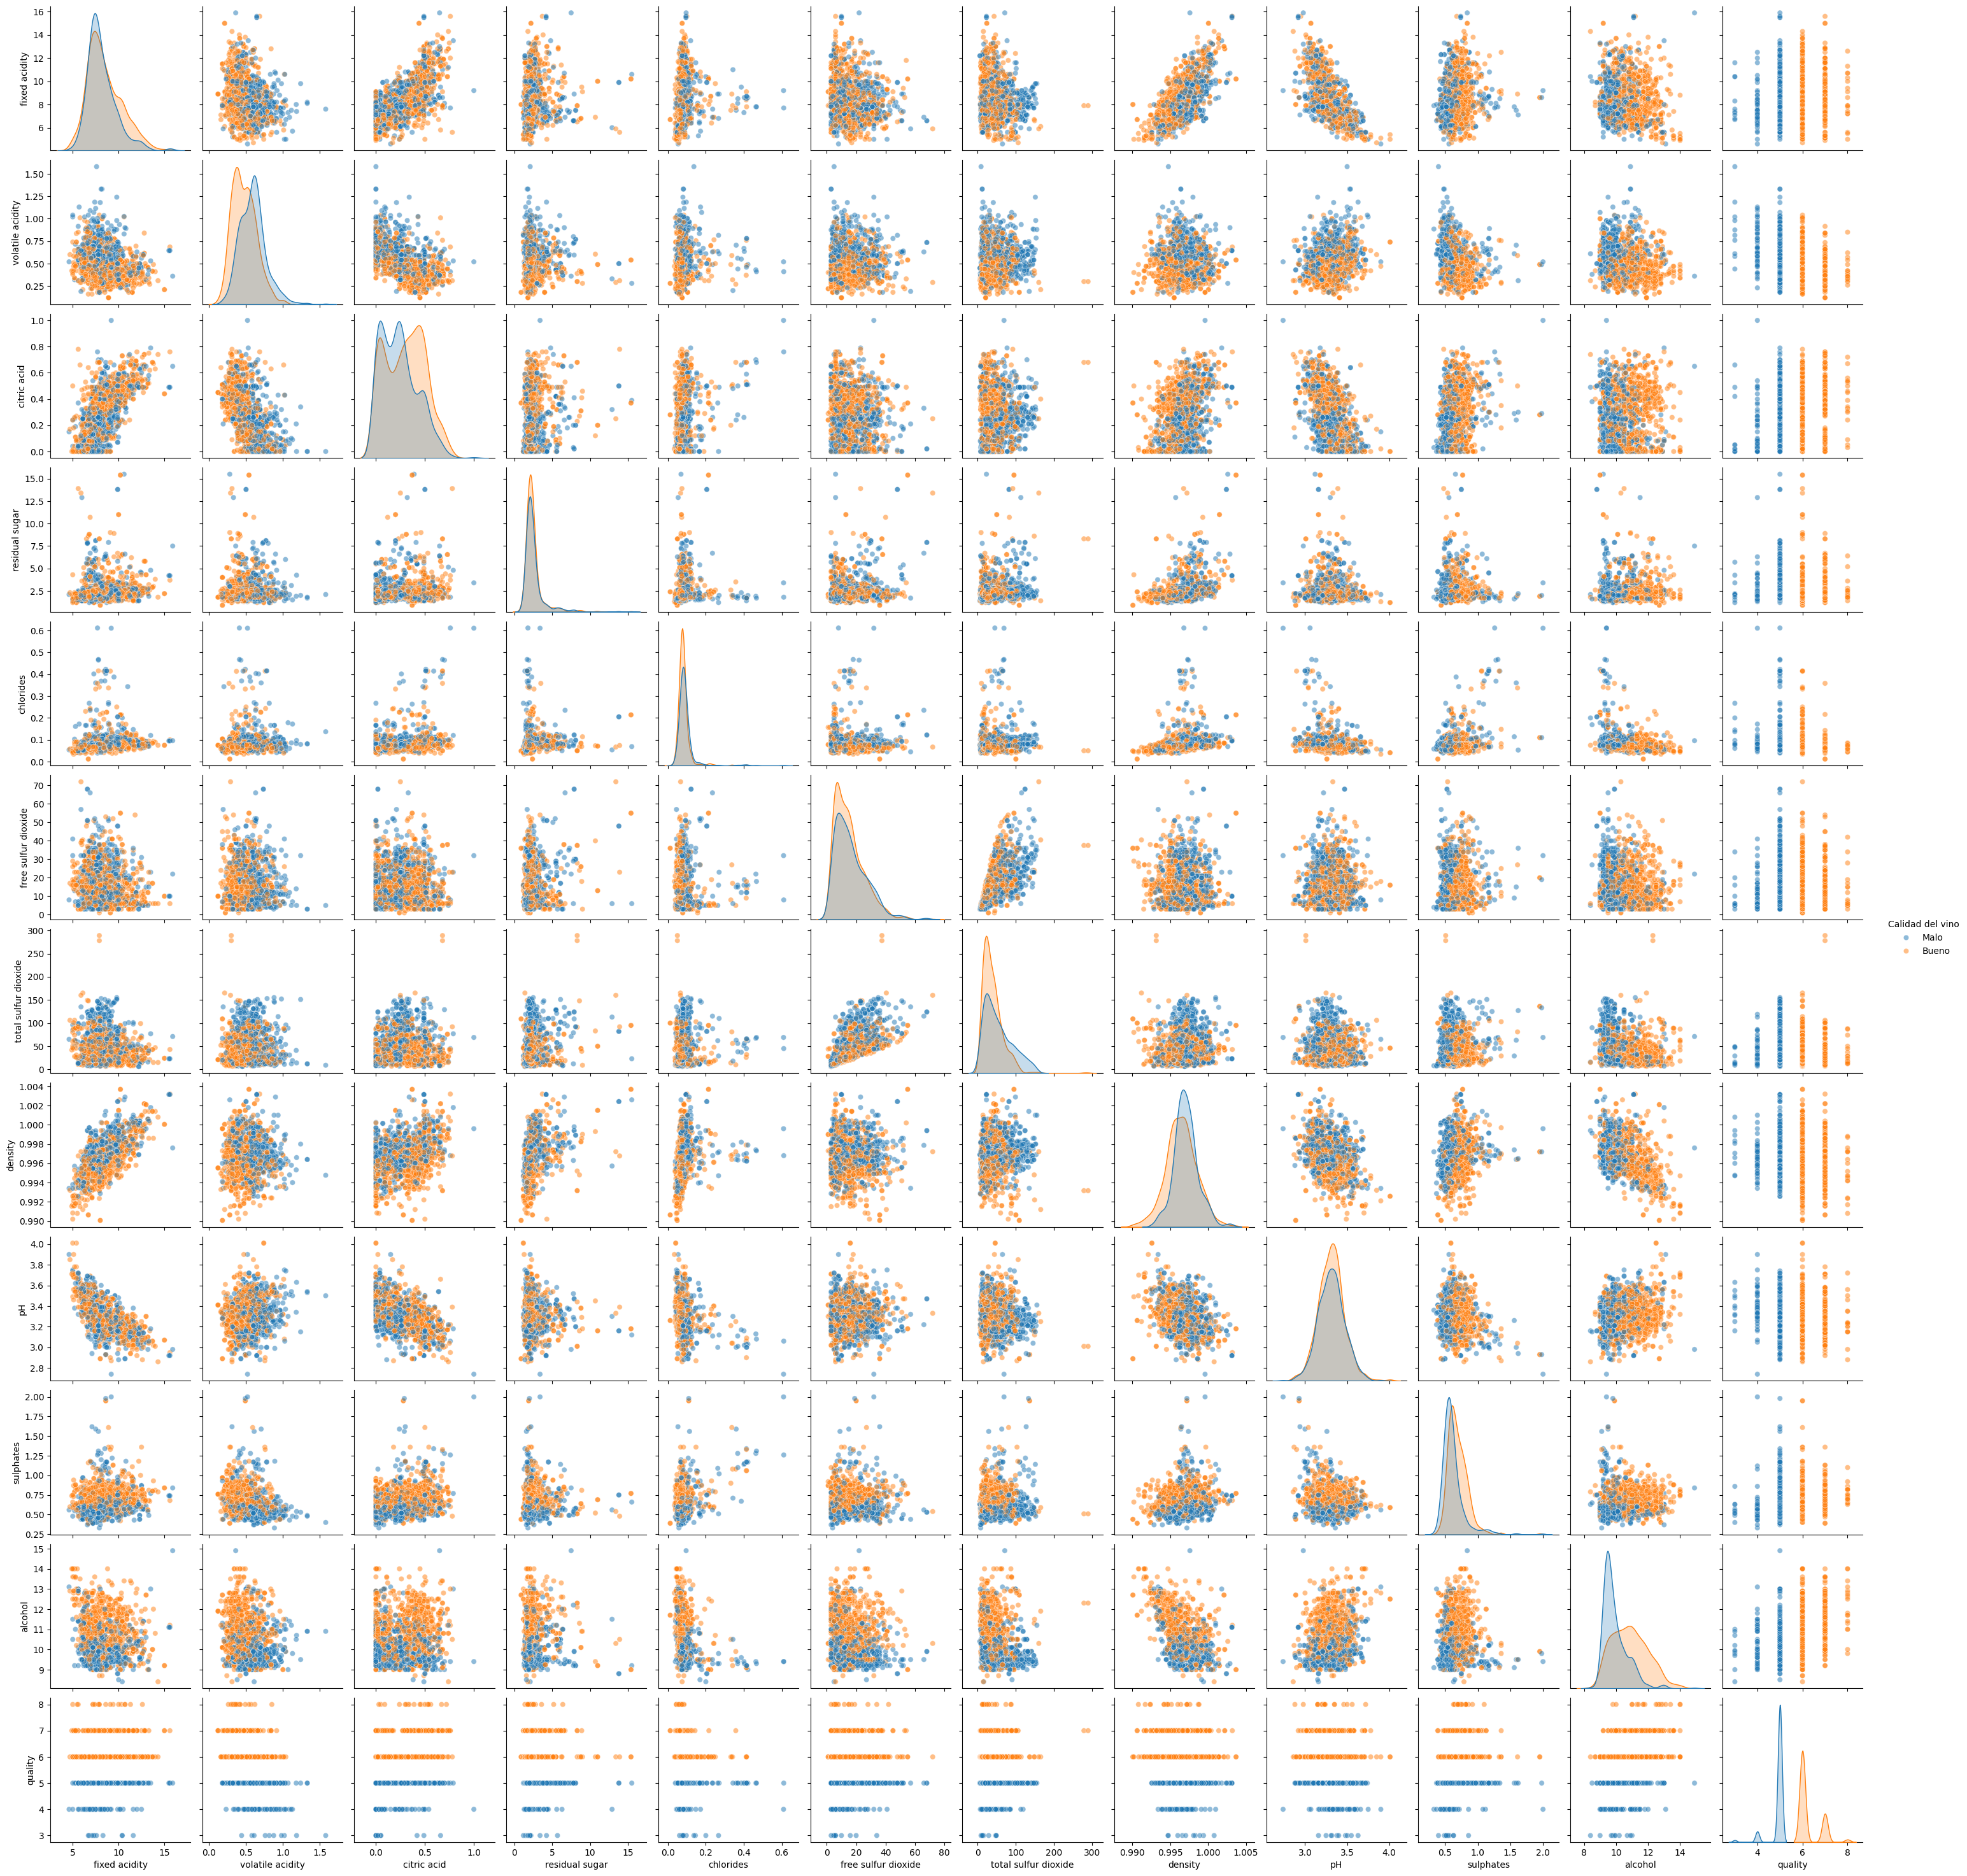

In [32]:
df['Calidad del vino'] = df['quality'].apply(lambda x: 'Bueno' if x > 5 else 'Malo')
sns.pairplot(df, hue='Calidad del vino', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

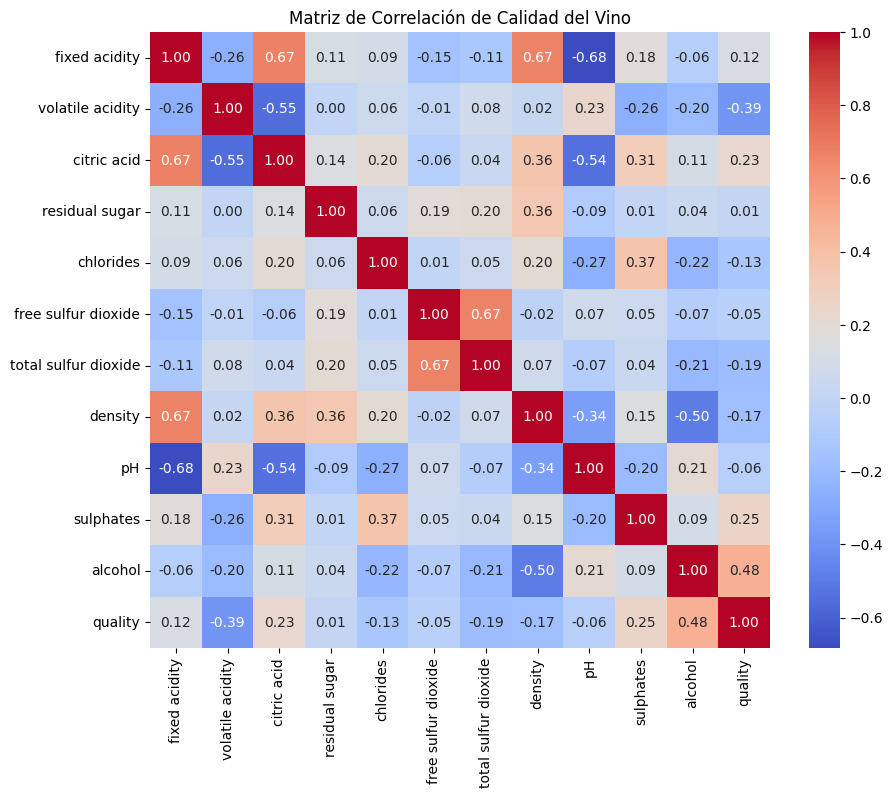

In [15]:
# Matriz de Correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Calidad del Vino')
plt.show()


Guiados por los gráficos de dispersión y apoyados por una matriz de correlación determinamos los cinco atributos que mejor correlacionan con la calidad son los siguientes:

1. alcohol
2. volatile acidity
3. sulphates
4. citric acid
5. total sulfur dioxide

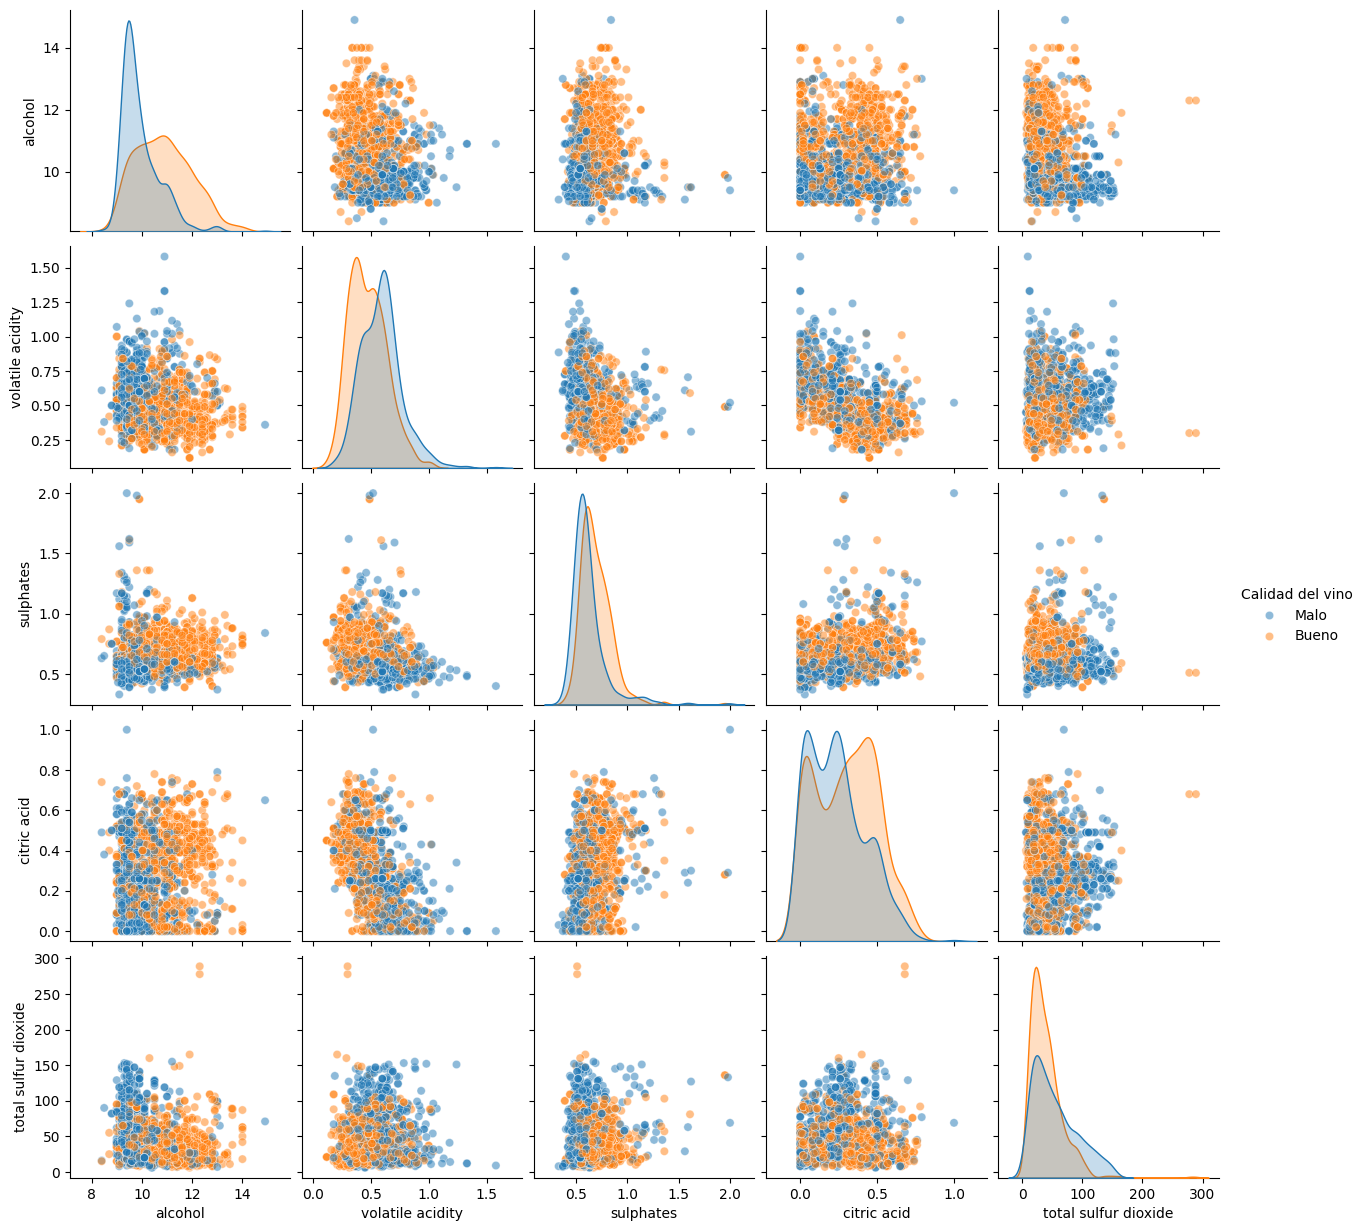

In [22]:
df['Calidad del vino'] = df['quality'].apply(lambda x: 'Bueno' if x > 5 else 'Malo')
selected_columns = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']
sns.pairplot(df, vars=selected_columns, hue='Calidad del vino', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


Los 5 mejores pares son:
1.  alcohol & volatile acidity
2. alcohol & sulphates
3. citric acid & sulphates
4. citric acid & total sulfur dioxide
5. alcohol & citric acid

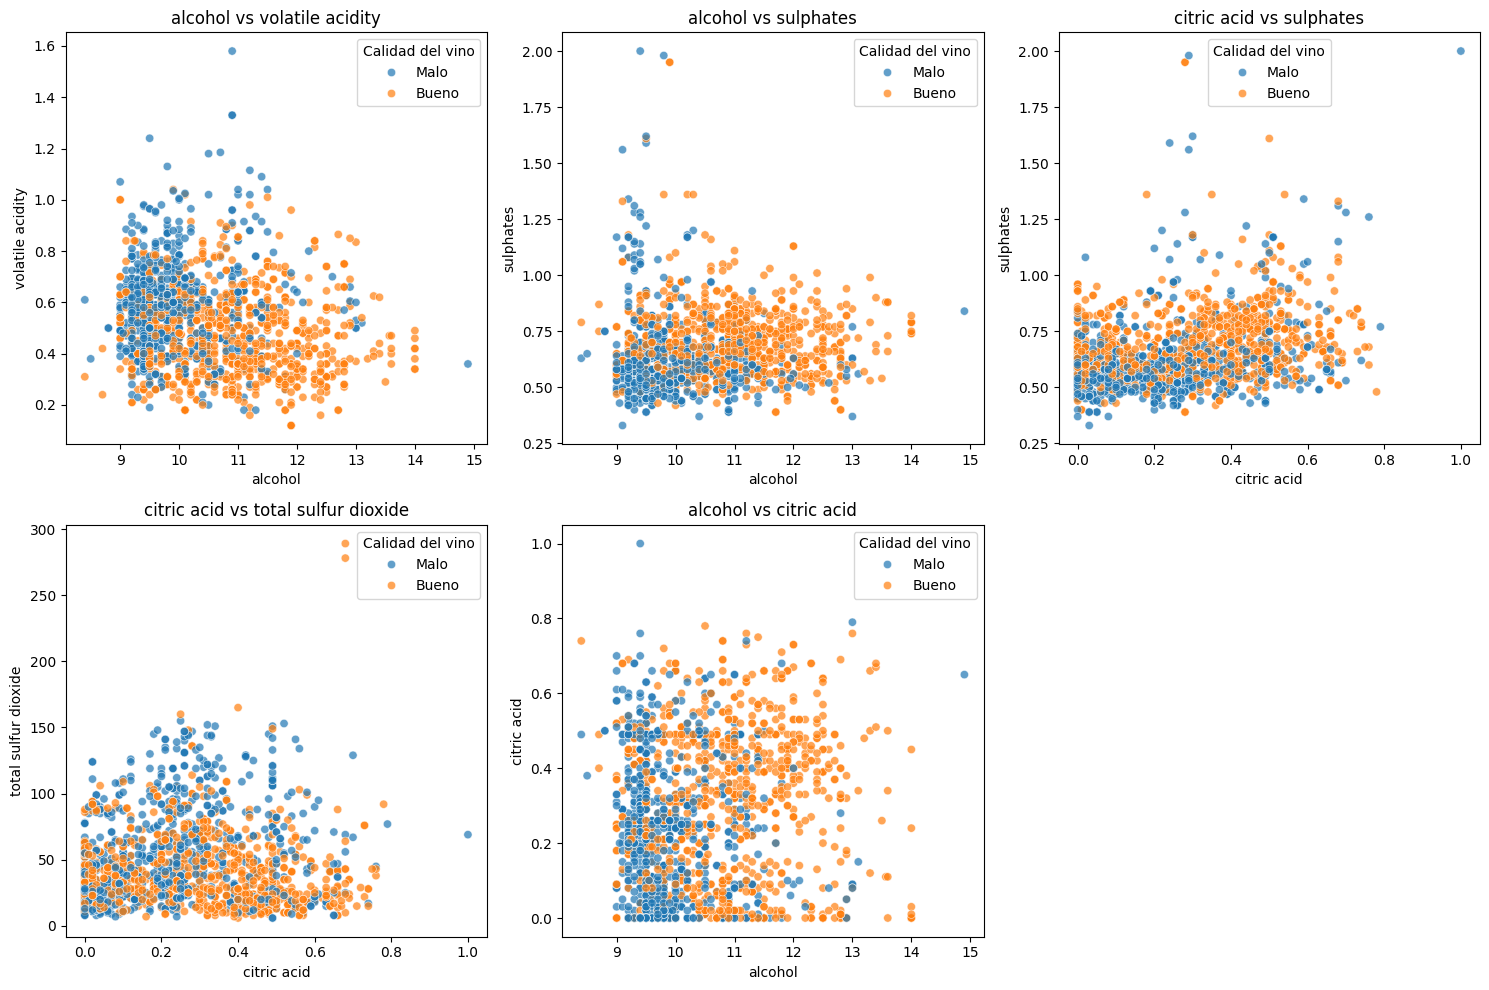

In [27]:
match_top = [
    ('alcohol', 'volatile acidity'),
    ('alcohol', 'sulphates'),
    ('citric acid', 'sulphates'),
    ('citric acid', 'total sulfur dioxide'),
    ('alcohol', 'citric acid')
]

plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(match_top, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col1, y=col2, hue='Calidad del vino', data=df, alpha=0.7)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()


Dos ejemplos de pares que no se separan bien son:
1. Residual Sugar vs Density
2. PH vs Free Sulfur Dioxide

Como es posible divisar en las siguientes gráficas, se hace imposible la separación de las calidades de vinos

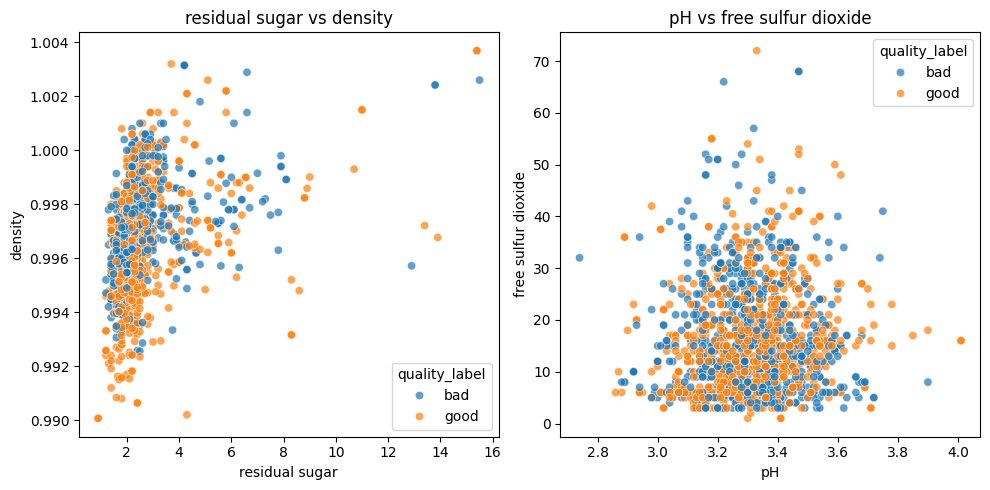

In [31]:
match_low = [
    ('residual sugar', 'density'),
    ('pH', 'free sulfur dioxide')
]

# Graficar los pares de columnas solicitados
plt.figure(figsize=(10, 5))
for i, (col1, col2) in enumerate(match_low, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(x=col1, y=col2, hue='quality_label', data=df, alpha=0.7)
    plt.title(f'{col1} vs {col2}')
plt.tight_layout()
plt.show()


Luego de esto, deberás usar los métodos de reducción de dimensionalidad lineal y no lineal conocidos para reducir la cantidad de columnas para poder visualizar los datos. Esperamos que para cada uno de estos métodos muestres la separación entre calidades (cada calidad por separado) y la separación entre vinos buenos y malos. Esperamos también que explique sus resultados y te explayes con detalle sobre la significancia de sus resultados.

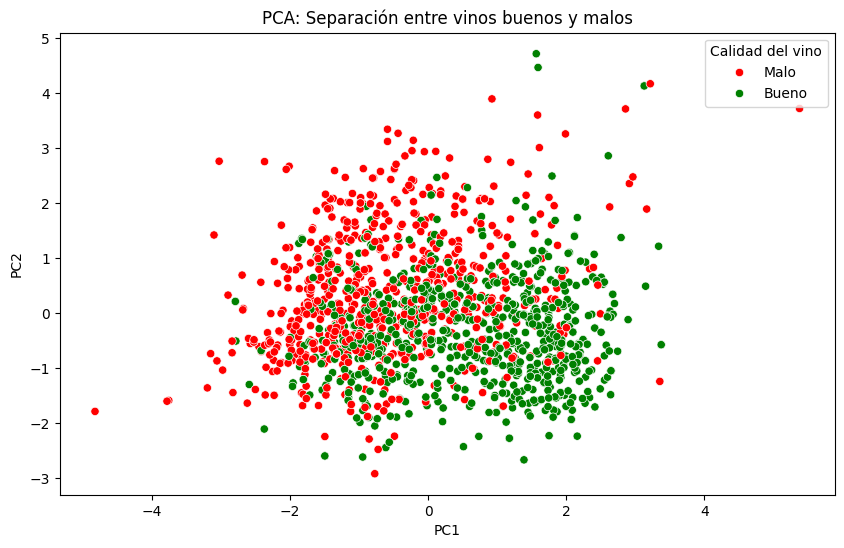

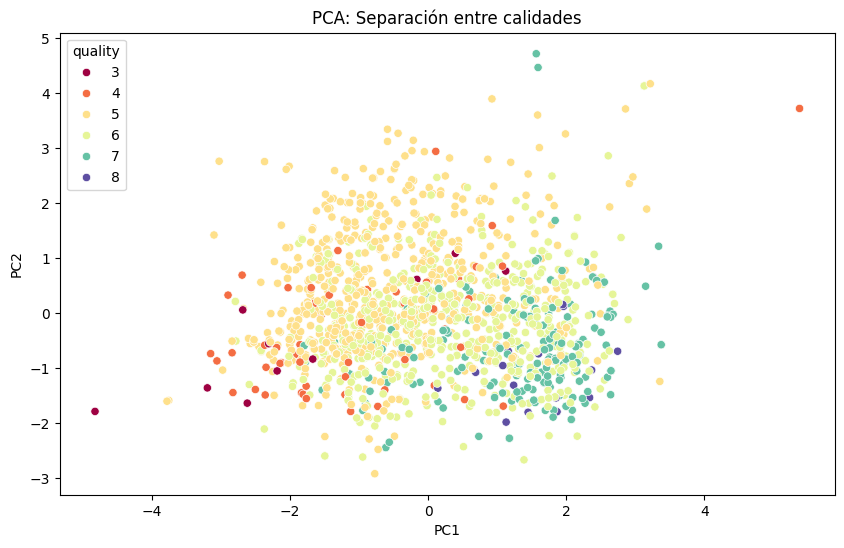

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

variables_elegidas = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']
features = df[variables_elegidas]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df['Calidad del vino'] = df['quality'].apply(lambda x: 'Bueno' if x > 5 else 'Malo')

### Reducción de dimensionalidad con PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Calidad del vino'] = df['Calidad del vino']
pca_df['quality'] = df['quality']

# Graficar PCA: Separación entre vinos buenos y malos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Calidad del vino', data=pca_df, palette={'Bueno': 'green', 'Malo': 'red'})
plt.title('PCA: Separación entre vinos buenos y malos')
plt.show()

# Graficar PCA: Separación entre calidades individuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=pca_df, palette='Spectral')
plt.title('PCA: Separación entre calidades')
plt.show()



Principales conclusiones:
* PC1: Captura la mayor parte de la variabilidad de los datos, captura las diferencias más significativas entre los vinos, debido a que  el contenido de alcohol y la acidez volátil, que tienden a correlacionarse fuertemente con la calidad.
* PC2: Captura la restante maypor parte de la variabilidad (no capturado por PC1), debido a que el impacto de las variaciones son menores (más sutiles)relacionadas con factores como el dióxido de azufre total y las sulfatos.
*   Las calidades se mezclan en el gráfico, esto indica que las diferencias entre niveles de calidad no están claramente representadas por las componentes principales, lo cual es un desafío frecuente en la evaluación de la calidad del vino, ya que esta depende de múltiples factores


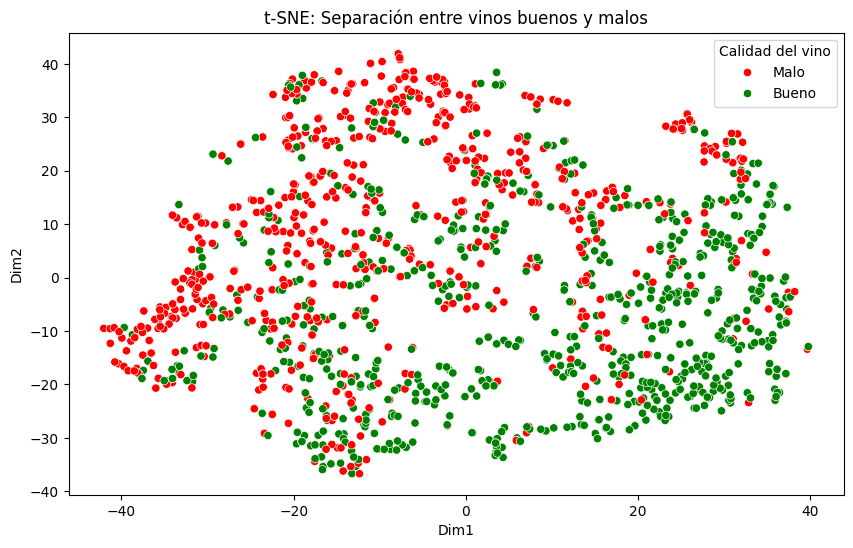

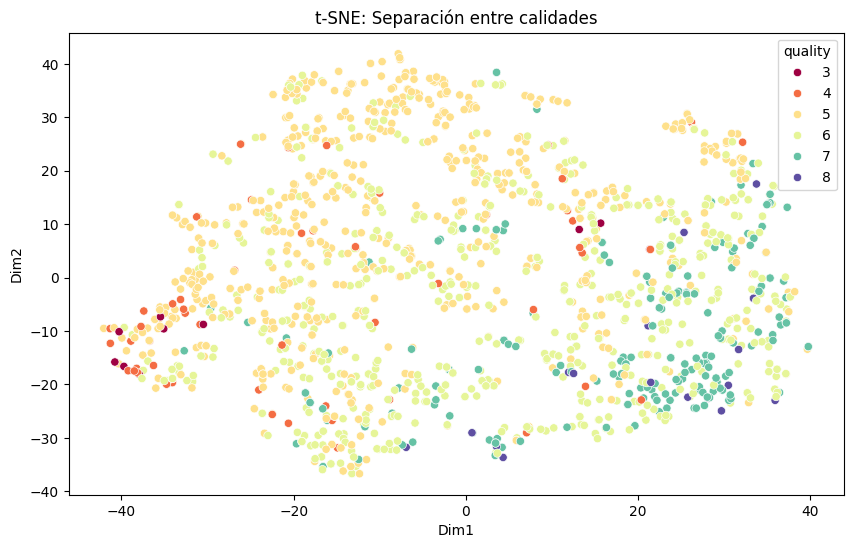

In [38]:
### Reducción de dimensionalidad con t-SNE

# Aplicar t-SNE con 2 componentes (usando las 5 columnas seleccionadas)
tsne = TSNE(n_components=2, random_state=42, n_iter=500, learning_rate=100)
tsne_result = tsne.fit_transform(scaled_features)

# Crear un dataframe con los resultados de t-SNE y las etiquetas de calidad
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['Calidad del vino'] = df['Calidad del vino']
tsne_df['quality'] = df['quality']

# Graficar t-SNE: Separación entre vinos buenos y malos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='Calidad del vino', data=tsne_df, palette={'Bueno': 'green', 'Malo': 'red'})
plt.title('t-SNE: Separación entre vinos buenos y malos')
plt.show()

# Graficar t-SNE: Separación entre calidades individuales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='quality', data=tsne_df, palette='Spectral')
plt.title('t-SNE: Separación entre calidades')
plt.show()

Principales conclusiones:
* Como es posible visualizar en el gráfico de vinos buenos vs malo existe una breve distinción entre las densidades, sin embargo, no es tan clara por lo que t-SNE no ha sido capaz de capturar una separación.
* Los vinos para cada nivel de calidad (3, 4, 5, etc.) forman clústeres o grupos distintos, t-SNE ha capturado bien las relaciones complejas entre las características y la calidad. Sin embargo, si las calidades se superponen en el gráfico, las características seleccionadas pueden no ser suficientes para diferenciar claramente entre los niveles de calidad.